# Sampling a GP on a Hyperbolic space

Let's draw some samples from a Gaussian process on a Hyperbolic space!

In [ ]:
!pip install backends==1.4.32 plum-dispatch==1.7.4  # temporary measure

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... /

In [2]:
# Import a backend.
import numpy as np
# Import the geometric_kernels backend.
import geometric_kernels
# # Import a space and an appropriate kernel.
from geometric_kernels.spaces.hyperbolic import Hyperbolic
from geometric_kernels.kernels.geometric_kernels import MaternKarhunenLoeveKernel
from geometric_kernels.kernels.feature_maps import random_phase_feature_map
# # import sampler
from geometric_kernels.sampling import sampler

INFO: Using numpy backend


In [3]:
import geomstats.visualization as visualization

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Define a manifold and build some grid on it:

In [5]:
# Create a manifold (2-dim sphere).
hyperboloid = Hyperbolic(dim=2)

In [45]:
s = np.linspace(-15, 15, 100)
xx, yy = np.meshgrid(s, s)
points = np.c_[xx.ravel(), yy.ravel()]
points = hyperboloid.from_coordinates(points, "intrinsic")

In [61]:
params, state = {}, {}
params["nu"] = 3.0/2.0
params["lengthscale"] = 0.5

Let's see what we've got:

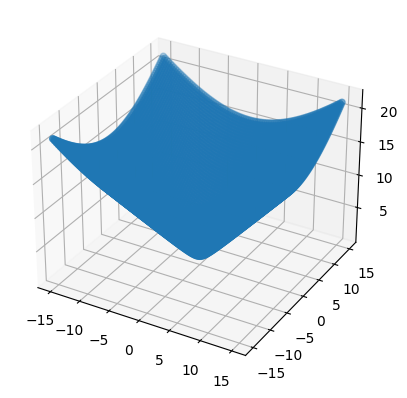

In [62]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:, 2], points[:, 1], points[:, 0])

In [63]:
# introduce random state for reproducibility (optional)
# `key` is jax's terminology
key = np.random.RandomState(seed=1234)

In [66]:
# compute feature map for this space
feature_map, context = random_phase_feature_map(hyperboloid, params, state, key, 100)

In [68]:
n_samples = 4
sample_paths = sampler(feature_map, s=n_samples)

Now, `sample_paths` is a *deterministic* function of `X`, if we prodive thesame key. It is not necessary, although recommended, to pass the key.

Let's actually evaluate the sample paths on our spherical grid `Xs` and see what we've got:

In [69]:
key, samples = sample_paths(points, key=key)  # new random state is returned along with the samples

(array([4.000e+00, 4.000e+00, 1.500e+01, 1.214e+03, 8.683e+03, 6.500e+01,
        7.000e+00, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([-345.95504589, -265.00604291, -184.05703993, -103.10803694,
         -22.15903396,   58.78996902,  139.738972  ,  220.68797499,
         301.63697797,  382.58598095,  463.53498393]),
 <BarContainer object of 10 artists>)

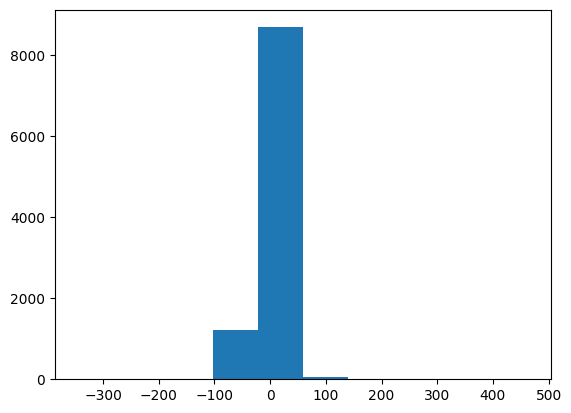

In [70]:
plt.hist(samples[:,0])  # need some normalization

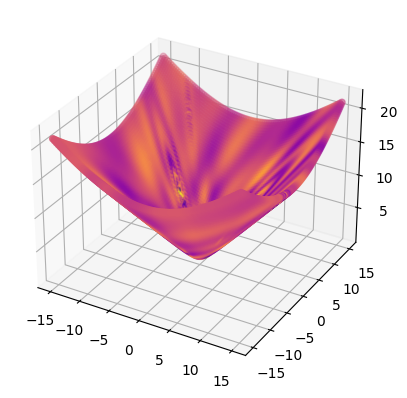

In [78]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:, 2], points[:, 1], points[:, 0], c=samples[:, 0], cmap='plasma', vmin=-100, vmax=100)

In [79]:
points_on_ball = hyperboloid.change_coordinates_system(points, "extrinsic", "ball")

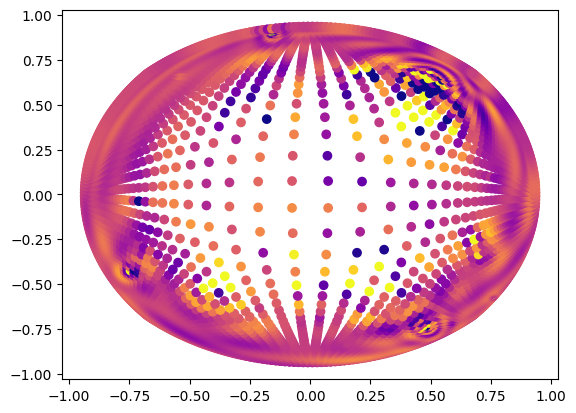

In [81]:
plt.scatter(points_on_ball[:, 0], points_on_ball[:, 1], c=samples[:, 0], cmap='plasma', vmin=-100, vmax=100)